In [39]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
plt.rcParams["savefig.format"] = 'pdf'
sns.set(font_scale=1.5, rc={'text.usetex' : True})
sns.set_style("white")
sns.set_style("ticks")
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]

In [40]:
def plot_inference_result(data, portion, true_parameter = False, save = False):
    print("number of samples: ", data.shape[0])
    if true_parameter:
        posterior_df = pd.DataFrame(np.exp(data[round(data.shape[0]*(1-portion)):,:]), columns=[r"$A$", r"$\beta_{i,e}$", r"$\nu_{s,e,r}$", r"$\nu_i$", r"$\gamma_e$", r"$\gamma_r$", r"$\gamma_d$", r"$\sigma$", r"$R_e$"])
    else:
        posterior_df = pd.DataFrame(data[round(data.shape[0]*(1-portion)):,:], columns=[r"$\ln(A)$", r"$\ln(\beta_{i,e})$", r"$\ln(\nu_{s,e,r})$", r"$\ln(\nu_i)$", r"$\ln(\gamma_e)$", r"$\ln(\gamma_r)$", r"$\ln(\gamma_d)$", r"$\ln(\sigma)$",r"$\ln(I_e)$"])
    g = sns.PairGrid(posterior_df)
    g = g.map_upper(sns.scatterplot)
    g = g.map_lower(sns.kdeplot, colors="C0")
    g = g.map_diag(sns.kdeplot, lw=2)

In [41]:
def diff_day(d1, d2):
    a = datetime.strptime(d1, "%Y-%m-%d")
    b = datetime.strptime(d2, "%Y-%m-%d")
    return abs((b-a)).days
    
    
print(diff_day("2020-07-15", "2020-08-09"))

25


In [61]:
n = 4
base_dir = 'mcmc_9/param_dim_7/calibration_result/'
data = np.load(base_dir + 'run_1/data.npy')
qoi = np.load(base_dir + 'run_1/qoi.npy')
cost = np.load(base_dir + 'run_1/cost.npy')
acceptance = np.load(base_dir + 'run_1/acceptance_rate.npy')
samples = np.load(base_dir + 'run_1/param_samples.npy')

ignore_samples = round(0.5 * samples.shape[0])
qoi = qoi[ignore_samples:]
cost = cost[ignore_samples:]
acceptance = acceptance[ignore_samples:]
samples = samples[ignore_samples:]

for i in range(n-1):
	file_dir = base_dir + 'run_'+str(i+2)+ '/'

	qoi_n = np.load(file_dir + 'qoi.npy')
	qoi = np.append(qoi, qoi_n[ignore_samples:], axis=0)

	cost_n = np.load(file_dir + 'cost.npy')
	cost = np.append(cost, cost_n[ignore_samples:], axis=0)

	samples_n = np.load(file_dir + 'param_samples.npy')
	samples = np.append(samples, samples_n[ignore_samples:], axis=0)

	acceptance_n = np.load(file_dir + 'acceptance_rate.npy')
	acceptance = np.append(acceptance, acceptance_n[ignore_samples:], axis=0)

# write
np.save(base_dir + 'data.npy', data)
np.save(base_dir + 'qoi.npy', qoi)
np.save(base_dir + 'cost.npy', cost)
np.save(base_dir + 'param_samples.npy', samples)
np.save(base_dir + 'acceptance_rate.npy', acceptance)

print('num samples: {}'.format(samples.shape[0]))

num samples: 400


In [62]:
#data_path = './inference_result/full_t20_run/'
#data_path = './inference_result/synthetic_sd15_t5/'
#data_path = './inference_result/synthetic_sd25_t5/'

data_path = 'mcmc_9/param_dim_7/calibration_result/run_1/'

In [63]:
qoi = np.load(data_path + 'qoi.npy')
print(qoi.shape)

(240, 25, 2)


In [64]:
data = np.load(data_path + 'data.npy')
print(data.shape)

(25, 2)


In [65]:
acceptance = np.load(data_path + 'acceptance_rate.npy')
print(acceptance.shape)

(240,)


In [66]:
cost = np.load(data_path + 'cost.npy')
print(cost.shape)

(240,)


In [67]:
post_samples = np.load(data_path + 'param_samples.npy')
print(post_samples.shape)

(240, 7)


<Figure size 432x288 with 0 Axes>

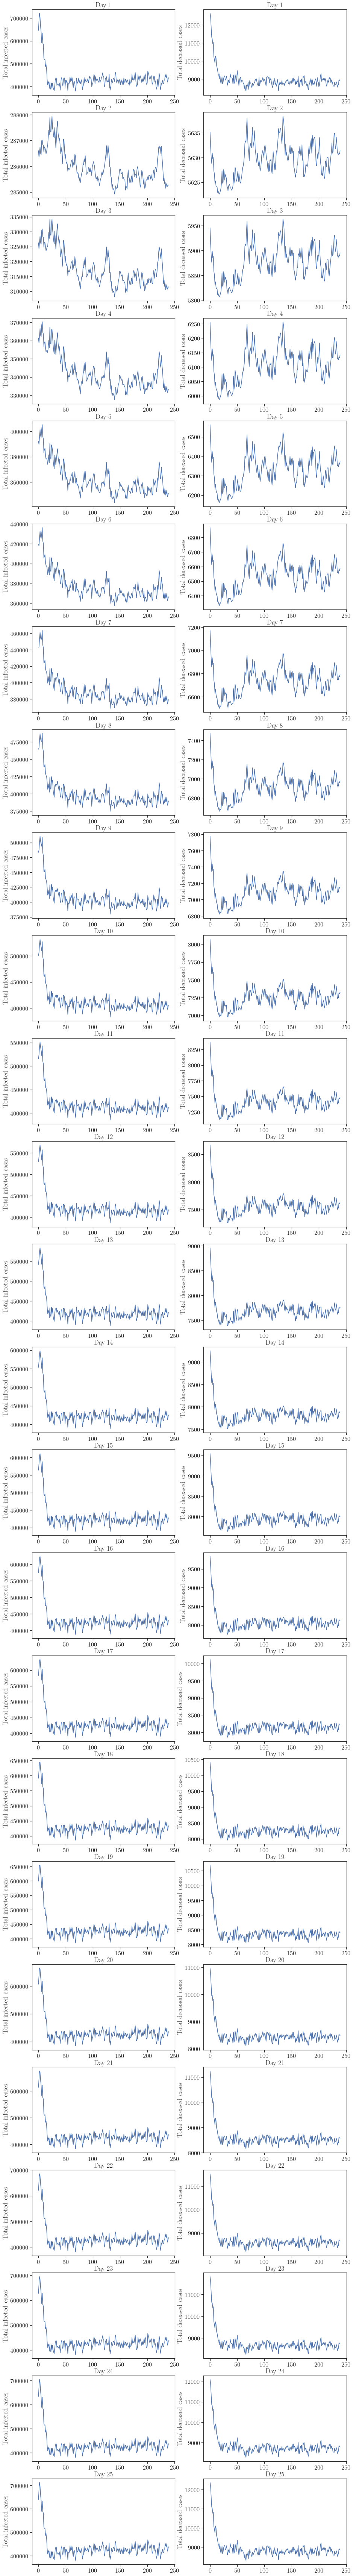

In [68]:
plt.figure(1)
fig, axs = plt.subplots(nrows=qoi.shape[1], ncols=2, figsize=(15,qoi.shape[1]*5))
for row in range(qoi.shape[1]):
    axs[row, 0].plot(np.arange(qoi.shape[0]), qoi[:,row-1,0])
#     axs[row, 0].axhline(y=noisey_solution[row-1, 0], color='r', linestyle='-')
#     if synthetic_data_used:
#         axs[row, 0].axhline(y=true_solution[row-1, 0], color='b', linestyle='--')
    axs[row, 0].set_title(r"Day " + str(row+1))
    axs[row, 0].set_ylabel(r'Total infected cases')
    axs[row, 1].plot(np.arange(qoi.shape[0]), qoi[:,row-1,1])
#     axs[row, 1].axhline(y=noisey_solution[row-1, 1], color='r', linestyle='-')
#     if synthetic_data_used:
#         axs[row, 1].axhline(y=true_solution[row-1, 1], color='g', linestyle='--')
    axs[row, 1].set_title(r"Day " + str(row+1))
    axs[row, 1].set_ylabel(r'Total deceased cases')
plt.show()

Integrated autocorrelation time 10.088914078723839


(0.0, 1.0)

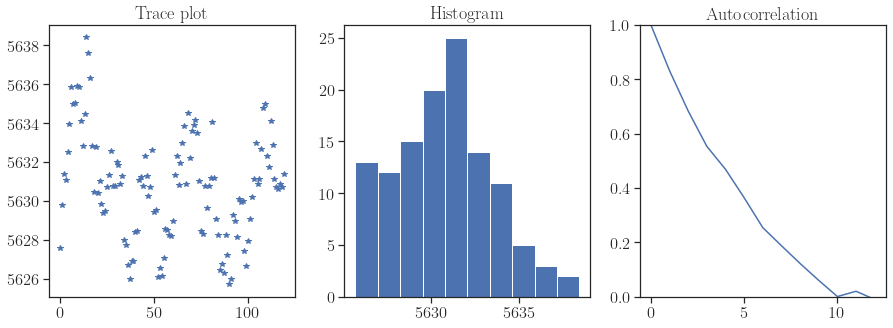

In [69]:
import hippylib as hl
day = 1
q = qoi[round(qoi.shape[0]/2.):, day-1, 1]
# q = qoi[:, day-1, 0]
integrated_corr_time, lags, acorrs = hl.integratedAutocorrelationTime(q)
print ("Integrated autocorrelation time", integrated_corr_time)

plt.figure(figsize=(15,5))
plt.subplot(131)
plt.plot(q, '*b')
plt.title(r'Trace plot')

plt.subplot(132)
plt.hist(q)
plt.title(r'Histogram')

plt.subplot(133)
plt.plot(lags, acorrs, '-b') 
plt.title(r'Autocorrelation')
plt.ylim([0., 1.])
    

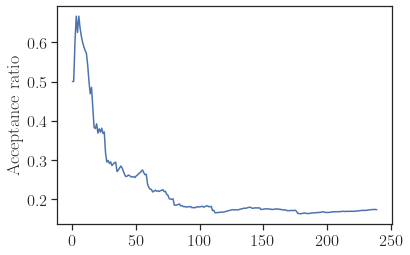

[0.5        0.5        0.6        0.66666667 0.625      0.66666667
 0.63636364 0.61538462 0.6        0.58823529 0.57894737 0.57142857
 0.54166667 0.5        0.46875    0.48484848 0.43589744 0.38297872
 0.38       0.39215686 0.36842105 0.37931034 0.37096774 0.38095238
 0.36764706 0.37142857 0.31764706 0.29473684 0.29896907 0.29126214
 0.2952381  0.28571429 0.28947368 0.29310345 0.29411765 0.27067669
 0.27407407 0.27941176 0.28467153 0.27972028 0.27152318 0.2625
 0.25748503 0.25882353 0.26162791 0.25988701 0.2568306  0.25668449
 0.25789474 0.25510204 0.25888325 0.26130653 0.265      0.26732673
 0.27093596 0.2745098  0.26760563 0.26244344 0.26339286 0.23809524
 0.23018868 0.22545455 0.225      0.21843003 0.22033898 0.22297297
 0.22039474 0.22149837 0.21974522 0.22151899 0.22257053 0.22429907
 0.21921922 0.2202381  0.21246459 0.20994475 0.20104439 0.20051414
 0.19949495 0.20100503 0.18493151 0.18468468 0.18526786 0.18625277
 0.1880531  0.18297872 0.18393235 0.18106996 0.18126273 0.18
 0.18

In [70]:
plt.plot(np.arange(acceptance.size), acceptance)
plt.ylabel('Acceptance ratio')
plt.show()
print(acceptance)

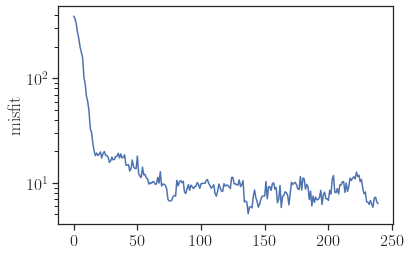

In [71]:
plt.semilogy(np.arange(cost.size), cost)
plt.ylabel('misfit')
plt.show()


In [72]:
post_samples = np.load(data_path + 'param_samples.npy')
post_samples = post_samples[round(post_samples.shape[0]*0.25):, :]
# post_samples = post_samples[150:, :]
print(post_samples.shape)

(180, 7)


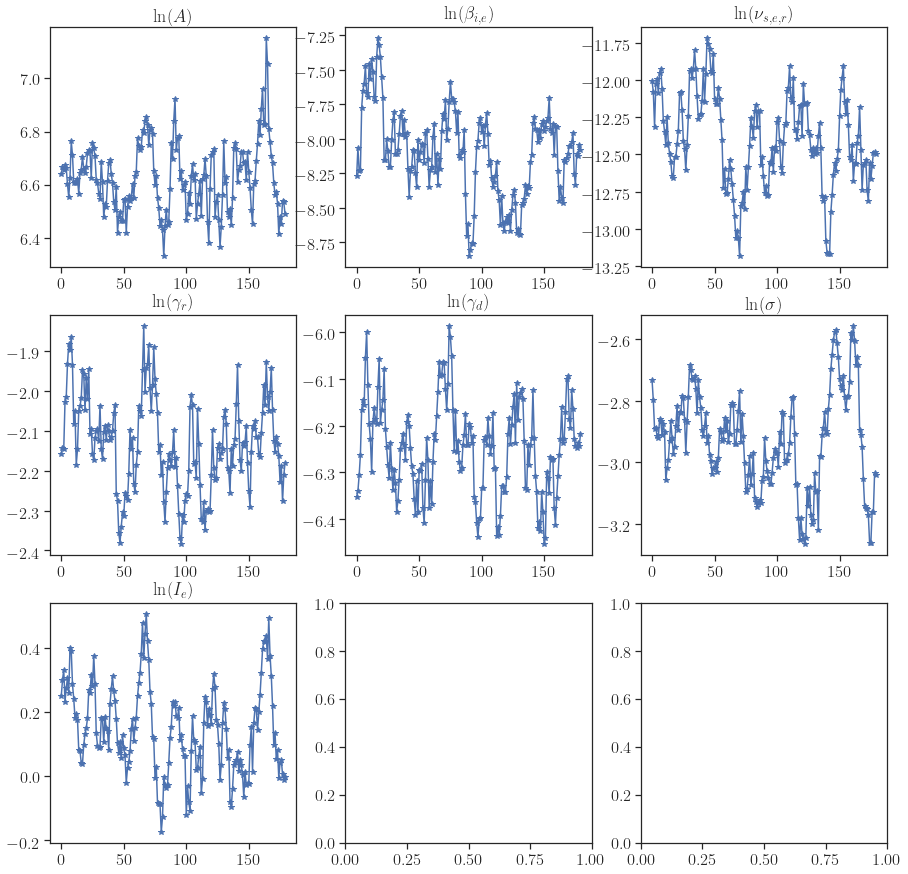

In [73]:
titles = [r"$\ln(A)$", r"$\ln(\beta_{i,e})$", r"$\ln(\nu_{s,e,r})$", r"$\ln(\gamma_r)$", r"$\ln(\gamma_d)$", r"$\ln(\sigma)$",r"$\ln(I_e)$"]
# titles = [r"$\ln(A)$", r"$\ln(\beta_{i,e})$", r"$\ln(\nu_{s,e,r})$", r"$\ln(\nu_i)$", r"$\ln(\gamma_e)$", r"$\ln(\gamma_r)$", r"$\ln(\gamma_d)$", r"$\ln(\sigma)$",r"$\ln(I_e)$"]
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15,15))
idx = 0
for col in range (3):
    for row in range (3):
        if idx < 7:
            axs[col, row].plot(np.arange(post_samples.shape[0]), post_samples[:, idx], '*-')
            axs[col, row].set_title(titles[idx])
        idx +=1

Integrated autocorrelation time 8.404746834574652
Integrated autocorrelation time 13.832373617167553
Integrated autocorrelation time 12.48761293768341
Integrated autocorrelation time 10.54668160650654
Integrated autocorrelation time 9.31049214179489
Integrated autocorrelation time 14.332998669696124
Integrated autocorrelation time 9.831357894302137


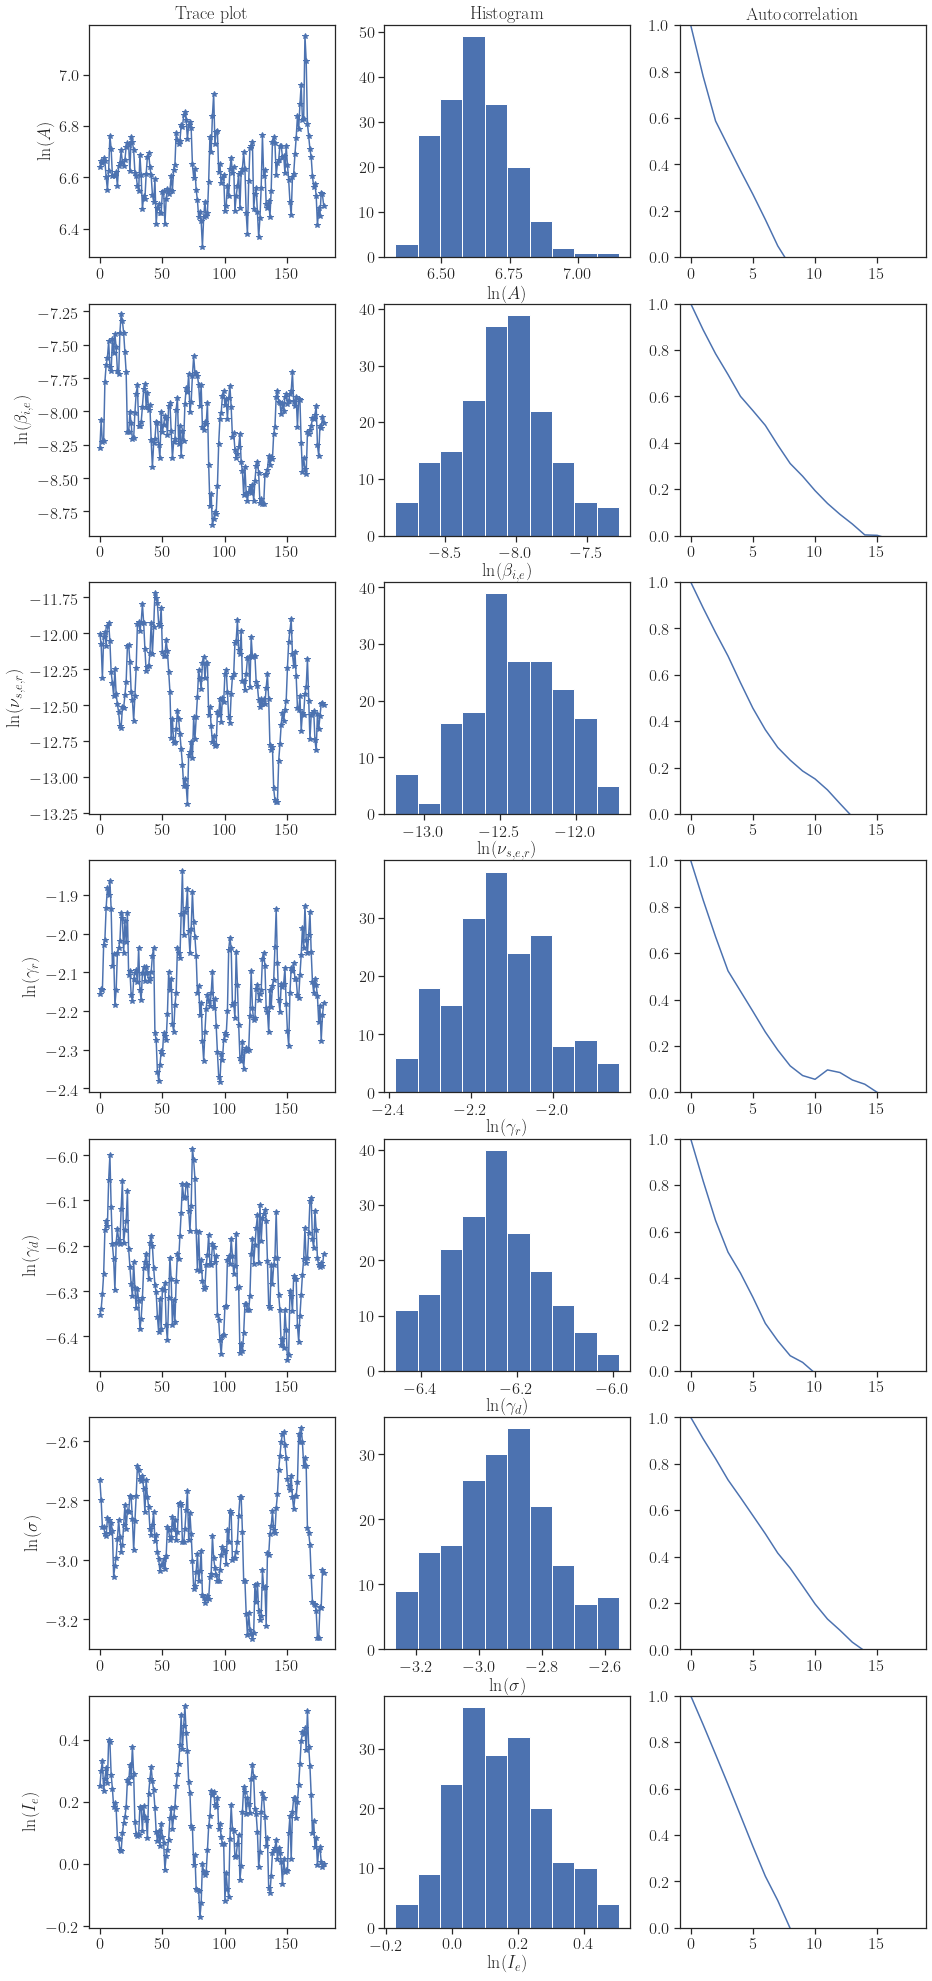

In [74]:
import hippylib as hl

fig, axs = plt.subplots(nrows=post_samples.shape[1], ncols=3, figsize=(15,post_samples.shape[1]*5))
for row in range(post_samples.shape[1]):
    integrated_corr_time, lags, acorrs = hl.integratedAutocorrelationTime(post_samples[:, row])
    print ("Integrated autocorrelation time", integrated_corr_time)
    axs[row, 0].plot(post_samples[:, row], '*-b')
    
    axs[row, 0].set_ylabel(titles[row])
    axs[row, 1].hist(post_samples[:, row])
    
    axs[row, 1].set_xlabel(titles[row])
    axs[row, 2].plot(lags, acorrs, '-b')
    axs[row, 2].set_ylim([0., 1.])
    
axs[0, 0].set_title(r'Trace plot')
axs[0, 1].set_title(r'Histogram')
axs[0, 2].set_title(r'Autocorrelation')
plt.show()

In [75]:
#plot_inference_result(param_data, 1., true_parameter = False)

In [76]:
mean = np.exp(np.mean(post_samples, axis = 0))

In [77]:
print(mean)

[7.55413050e+02 3.04769438e-04 4.12307633e-06 1.18521164e-01
 1.93440184e-03 5.34152648e-02 1.15840697e+00]


In [26]:
run_names = [None]*5
for i in range(4):
    run_names[i] = "run_" +str(i+1) + "/"
for i in range(4):
    data_path = '../../Results/mcmc_multi_chain/mcmc_4/param_dim_7/validation_result/' + run_names[i]
    param_name = 'param_samples'
    param_data = np.load(data_path + param_name + '.npy')
    
    qoi_data = np.load(data_path + 'qoi.npy')
    if i == 0:
#         total_param_data = param_data[round(param_data.shape[0]/2.):, :].copy()
        total_param_data = param_data[300:, :].copy()
        total_qoi_data = qoi_data[300:, :].copy()
    else:
#         total_param_data = np.append(total_param_data, param_data[round(param_data.shape[0]/2.):, :], axis = 0)
        total_param_data = np.append(total_param_data, param_data[300:, :], axis = 0)
        total_qoi_data = np.append(total_qoi_data, qoi_data[300:, :], axis = 0)
#     mean = np.exp(np.mean(param_data, axis = 0))
#     print(mean)

FileNotFoundError: [Errno 2] No such file or directory: '../../Results/mcmc_multi_chain/mcmc_4/param_dim_7/validation_result/run_1/param_samples.npy'

In [ ]:
total_param_data.shape, total_qoi_data.shape

In [ ]:
plot_inference_result(total_param_data, 1., true_parameter = False)

In [ ]:
mean_more = np.exp(np.mean(total_param_data, axis = 0))

In [ ]:
print(mean_more)

In [ ]:
print(mean_new)
print(mean_more)

In [ ]:
print(np.log(mean_1))
print(np.log(mean_2))
print(np.log(mean_3))

In [ ]:
total_param_data.shape

In [ ]:
posterior = np.delete(total_param_data, [3,4], axis = 1)

In [ ]:
posterior.shape

In [ ]:
print(np.exp(np.mean(posterior, axis = 0)))

In [ ]:
np.save('calibration_posterior_samples.npy', posterior)

In [27]:
import dolfin as dl
import hippylib as hl
mesh_path = '../../Data/mesh/'
mesh = dl.Mesh(mesh_path + "mesh_5h.xml")
Vh_PARAMETER = dl.VectorFunctionSpace(mesh, "R", degree=0, dim=7)
p_mean = np.mean(post_samples, axis = 0)
p_cov = np.cov(post_samples, rowvar = False)
mean = dl.Function(Vh_PARAMETER)
mean.vector().set_local(p_mean)
prior = hl.GaussianRealPrior(Vh_PARAMETER, p_cov, mean=mean.vector())

Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.


In [28]:
noise = dl.Vector()
prior.init_vector(noise,"noise")
hl.parRandom.normal(1., noise)
m = dl.Vector()
prior.init_vector(m, 0)
n_samples = 1000000
prior_samples = np.empty((n_samples ,7))
for i in range(n_samples):
    hl.parRandom.normal(1., noise)
    prior.sample(noise,m)
    prior_samples[i,:] = m.get_local()

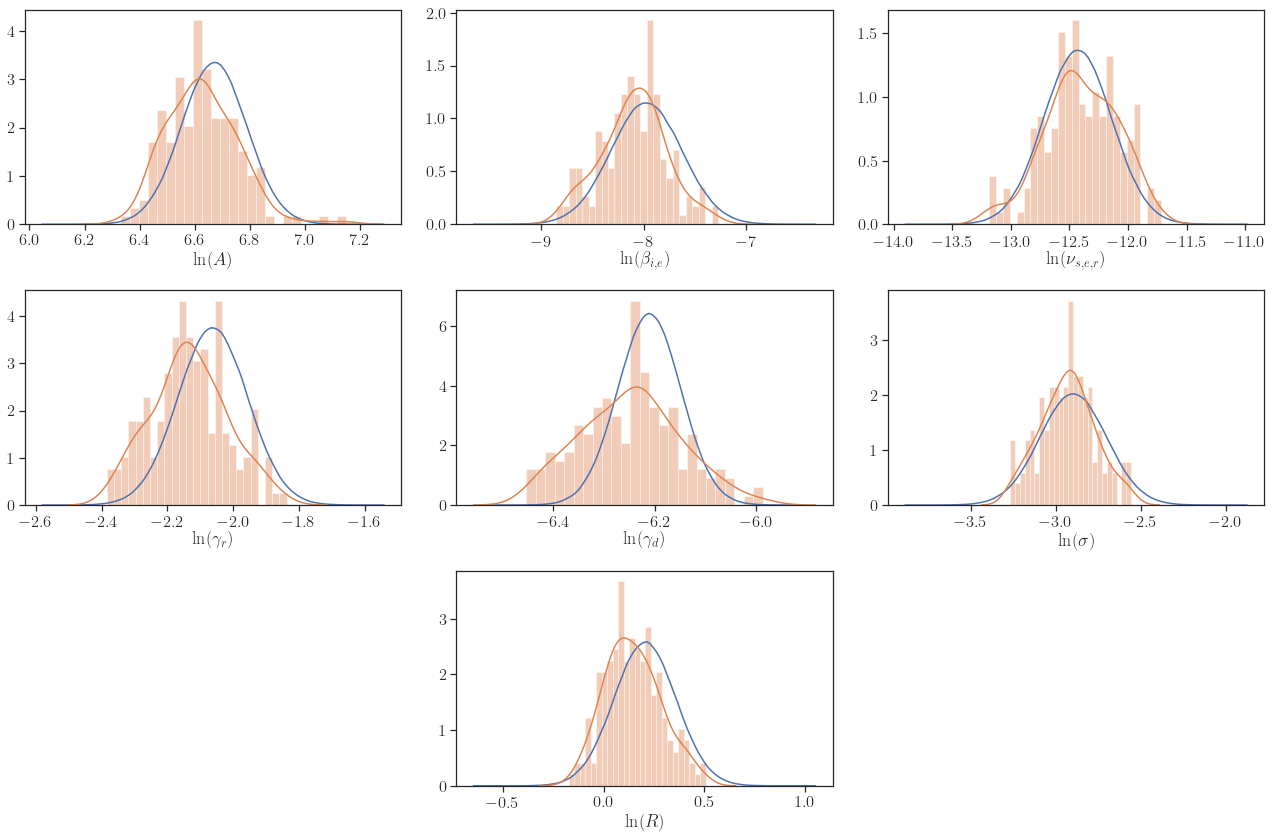

In [78]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize = (18,12))
titles = [r"$\ln(A)$", r"$\ln(\beta_{i,e})$", r"$\ln(\nu_{s,e,r})$", r"$\ln(\gamma_r)$", r"$\ln(\gamma_d)$", r"$\ln(\sigma)$",r"$\ln(R)$"]
idx = 0
for row in range(3):
    for col in range(3):
        if not row == 2 or col == 1:
            sns.distplot(prior_samples[:, idx], hist=False, ax=ax[row, col]);
            sns.distplot(post_samples[:, idx], hist=True, bins = 25, ax=ax[row, col])
            ax[row,col].set_xlabel(titles[idx])
            idx += 1
        else:
            ax[row, col].axis('off')
fig.tight_layout()
# plt.savefig("prior_vs_posterior_validation.pdf",bbox_inches = "tight")

In [ ]:
data_path = '../../Data/covid_11August2020/'
infected_total_district = np.loadtxt(data_path + 'infected_total_district.txt')
deceased_district = np.loadtxt(data_path + 'deceased_district.txt')

In [ ]:
infected_total_district.shape
deceased_district.shape

In [ ]:
data_start = "2020-07-15"
date = "2020-07-15"

In [ ]:
simulation_time = 25

In [ ]:
def validate_date(date_text):
    try:
        datetime.strptime(date_text, '%Y-%m-%d')
    except ValueError:
        raise ValueError("Incorrect data format, should be YYYY-MM-DD")
        
def extract_district_dataset(infected_cases, deceased_cases, date, simulation_time):        
    validate_date(date)
    d0 = datetime.strptime(data_start, "%Y-%m-%d")
    d1 = datetime.strptime(date, "%Y-%m-%d")
    day_index = abs((d1-d0)).days
        
    if not infected_cases.size == deceased_cases.size:
        raise IndexError("The total decease cases data and the total infected cases data does not match in size. Please re-check the data")
        
    data = np.empty((round(simulation_time), 25, 2))
    data[:, :, 0] = infected_cases[day_index+1:(day_index + round(simulation_time)+1):1, :]
    data[:, :, 1] = deceased_cases[day_index+1:(day_index + round(simulation_time)+1):1, :]
    return data

In [ ]:
district_data = extract_district_dataset(infected_total_district, deceased_district, date, simulation_time)

In [ ]:
print(district_data.shape)

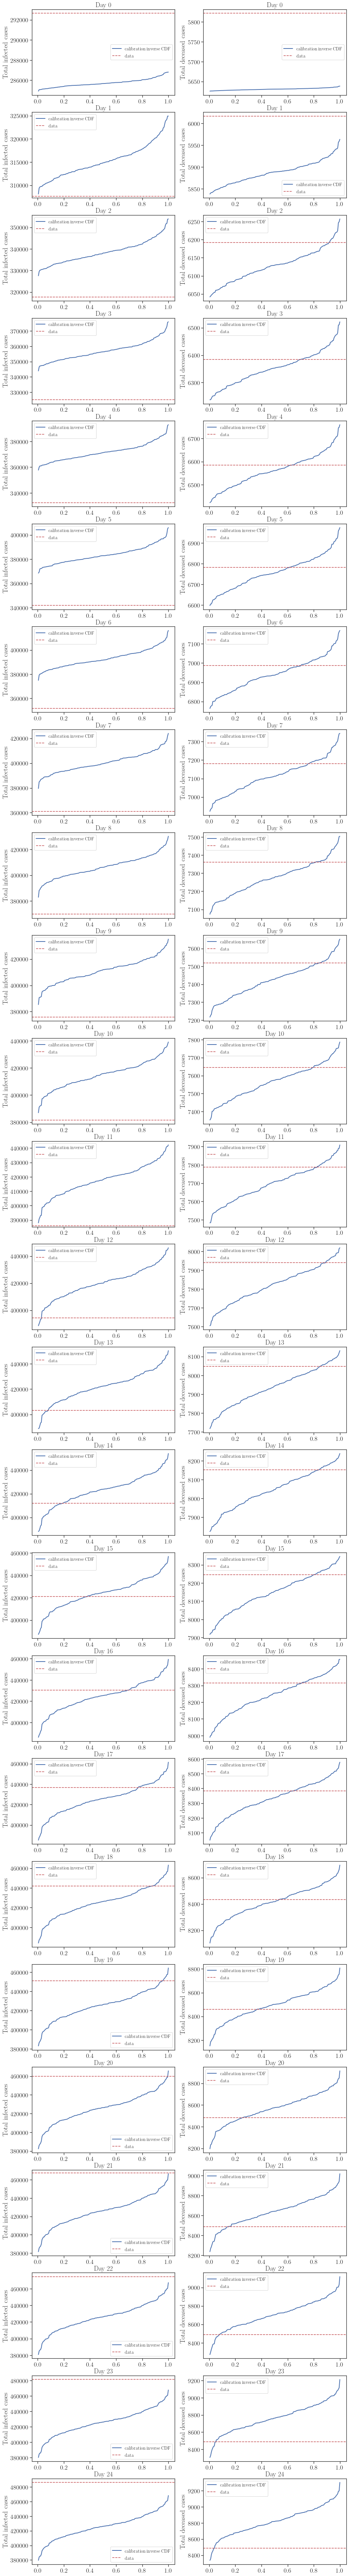

In [79]:
qoi = qoi[round(qoi.shape[0]*0.25):, :, :]

fig, axs = plt.subplots(nrows=25, ncols=2, figsize=(15,5*25))
for row in range(25):
    x_c = np.sort(qoi[:,row,0])
    n_c = x_c.size
    y_c = np.arange(1, n_c+1) / n_c
    axs[row, 0].plot(y_c, x_c, label = r'calibration inverse CDF', linewidth = 2.)
    axs[row, 0].axhline(y = data[row, 0], color='r', linestyle='--', label = r'data')
    axs[row, 0].set_title(r"Day " + str(row))
    axs[row, 0].set_ylabel(r'Total infected cases')
    axs[row, 0].legend(fontsize = 12, fancybox=True)
    
    x_c = np.sort(qoi[:,row,1])
    n_c = x_c.size
    y_c = np.arange(1, n_c+1) / n_c
    axs[row, 1].plot(y_c, x_c, label = 'calibration inverse CDF', linewidth = 2.)
    axs[row, 1].axhline(y = data[row, 1], color='r', linestyle='--', label = r'data')
    axs[row, 1].set_title(r"Day " + str(row))
    axs[row, 1].set_ylabel(r'Total deceased cases')
    axs[row, 1].legend(fontsize = 12, fancybox=True)

# plt.savefig("calibration_vs_validation_inv_cdf.pdf",bbox_inches = "tight")